In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

# Cấu hình hiển thị
#%matplotlib inline
#sns.set_style("whitegrid")
#plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
df = pd.read_csv('../data/processed/bank_marketing_raw.csv', sep=',')

print(df.info())
display(df)

print(f"\nTỷ lệ chuyển đổi (Conversion Rate): {df['target'].mean()*100:.2f}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    45211 non-null  int64 
 1   job                    44923 non-null  object
 2   marital                45211 non-null  object
 3   education              43354 non-null  object
 4   default                45211 non-null  object
 5   balance                45211 non-null  int64 
 6   housing                45211 non-null  object
 7   loan                   45211 non-null  object
 8   contact                32191 non-null  object
 9   day_of_week            45211 non-null  int64 
 10  month                  45211 non-null  object
 11  duration               45211 non-null  int64 
 12  campaign               45211 non-null  int64 
 13  pdays                  45211 non-null  int64 
 14  previous               45211 non-null  int64 
 15  poutcome           

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,...,duration,campaign,pdays,previous,poutcome,y,poutcome_missing,target,pdays_contacted,has_previous_campaign
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,...,261,1,-1,0,no_previous_campaign,no,1,0,1,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,...,151,1,-1,0,no_previous_campaign,no,1,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,...,76,1,-1,0,no_previous_campaign,no,1,0,1,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,...,92,1,-1,0,no_previous_campaign,no,1,0,1,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,...,198,1,-1,0,no_previous_campaign,no,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,no_previous_campaign,yes,1,1,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,no_previous_campaign,yes,1,1,1,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1127,5,184,3,success,yes,0,1,1,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,508,4,-1,0,no_previous_campaign,no,1,0,1,0



Tỷ lệ chuyển đổi (Conversion Rate): 11.70%


In [8]:
df_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
df_encoded.drop(df.loc[:,'pdays':'y'], axis=1, inplace=True)

print("Dữ liệu sau khi mã hóa:")
display(df_encoded.head())

Dữ liệu sau khi mã hóa:


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,poutcome_missing,target,pdays_contacted,has_previous_campaign
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,1,0,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,1,0,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,1,0,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,1,0,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,1,0,1,0


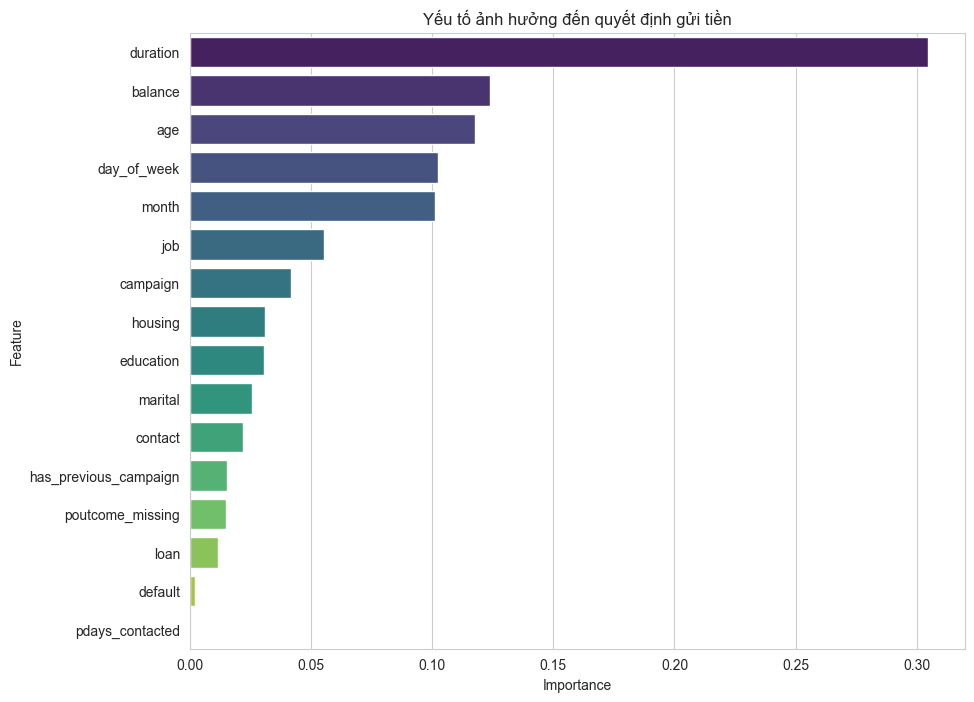

In [10]:
X = df_encoded.drop(['target'], axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', palette='viridis')
plt.title('Yếu tố ảnh hưởng đến quyết định gửi tiền')
plt.show()

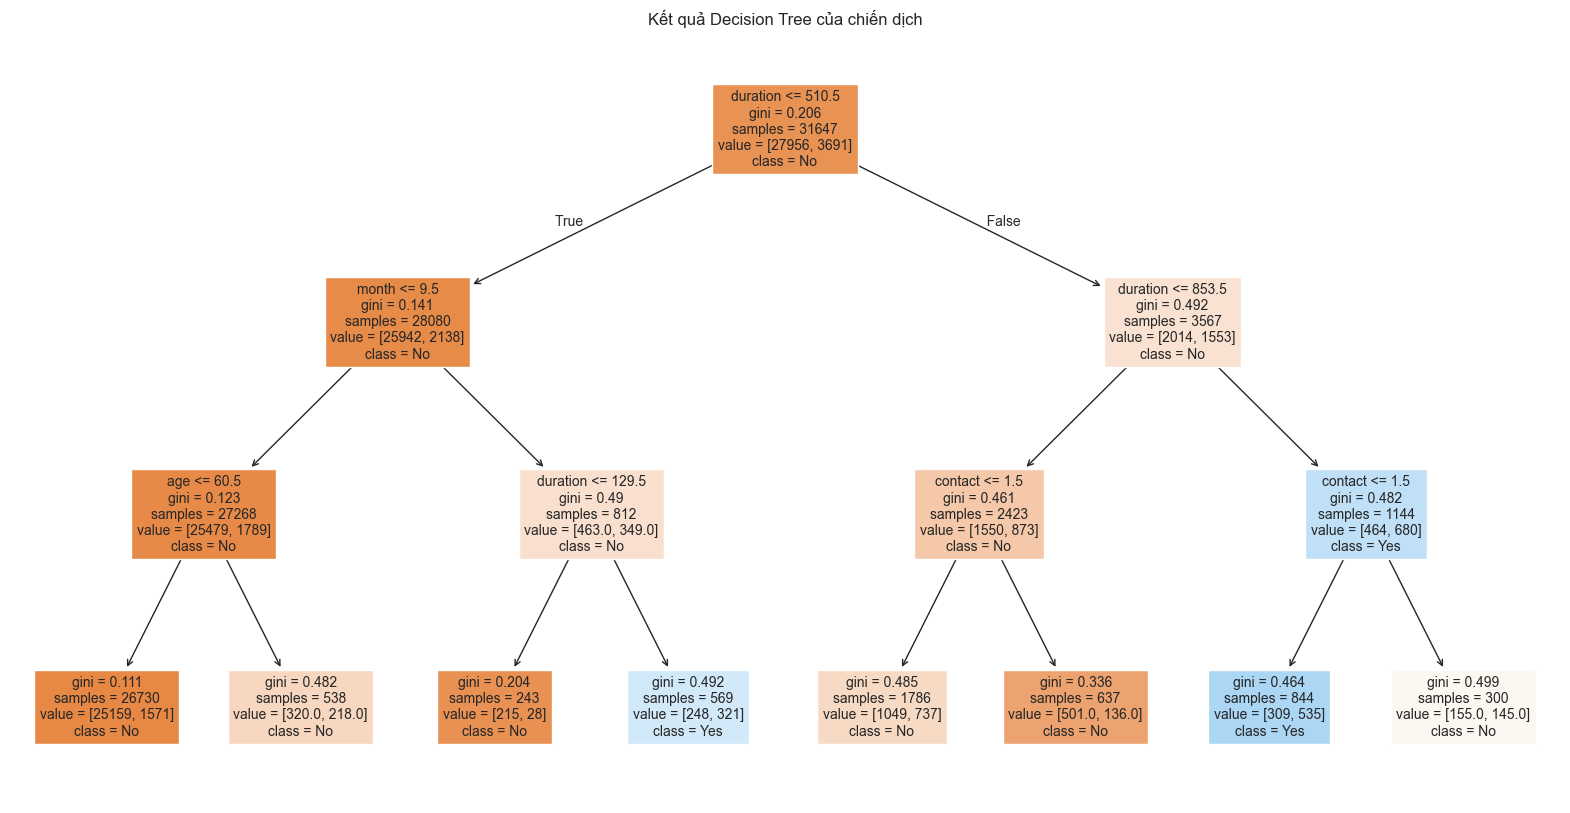


Các quy tắc được rút trích (Decision Rules):
|--- duration <= 510.50
|   |--- month <= 9.50
|   |   |--- age <= 60.50
|   |   |   |--- class: 0
|   |   |--- age >  60.50
|   |   |   |--- class: 0
|   |--- month >  9.50
|   |   |--- duration <= 129.50
|   |   |   |--- class: 0
|   |   |--- duration >  129.50
|   |   |   |--- class: 1
|--- duration >  510.50
|   |--- duration <= 853.50
|   |   |--- contact <= 1.50
|   |   |   |--- class: 0
|   |   |--- contact >  1.50
|   |   |   |--- class: 0
|   |--- duration >  853.50
|   |   |--- contact <= 1.50
|   |   |   |--- class: 1
|   |   |--- contact >  1.50
|   |   |   |--- class: 0



In [11]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title('Kết quả Decision Tree của chiến dịch')
plt.show()

tree_rules = export_text(dt, feature_names=list(X.columns))
print("\nCác quy tắc được rút trích (Decision Rules):")
print(tree_rules)

1. **Nút Gốc - "Người gác cổng": Thời lượng cuộc gọi (duration)**
Quy tắc: duration <= 510.5 (8.5 phút)

Yếu tố quan trọng nhất chia tách khách hàng thành 2 nhóm rõ rệt:

Nhóm gọi ngắn/trung bình (< 8.5 phút): Chiếm đa số, kết quả rất hỗn tạp, cần xét thêm nhiều yếu tố khác.

Nhóm gọi dài (> 8.5 phút): Tỷ lệ thành công rất cao. Khách hàng chịu nghe lâu nghĩa là họ đã có hứng thú.

2. **Phân tích Nhánh Trái (Cuộc gọi < 8.5 phút)**
Đây là nhóm "khó nhằn", cần sự khéo léo của nhân viên. Mô hình tiếp tục hỏi các câu hỏi sau:

Tầng 2: Tháng liên hệ (month)

Mô hình chia tách dựa trên tháng. Có một nhóm các tháng (có chỉ số > 9.5, là các tháng cuối năm 10, 11, 12) mang lại kết quả khác biệt.

Trường hợp 1: Các tháng thông thường (<= 9.5), kết quả đa phần là Class 0 (NO).

Tri thức: Vào những tháng này, nếu cuộc gọi ngắn dưới 8.5 phút, khả năng chốt đơn cực thấp bất kể độ tuổi hay các yếu tố khác.

Trường hợp 2: Các tháng "vàng" (> 9.5), mô hình kiểm tra lại thời lượng một lần nữa: duration > 129.5 (Hơn 2 phút).

KẾT QUẢ QUAN TRỌNG: Nếu gọi vào tháng tốt và giữ máy được trên 2 phút, khách hàng sẽ chuyển sang Class 1 (YES).

Tri thức hành động: Vào mùa cao điểm, nhân viên chỉ cần cố gắng giữ khách nghe máy qua phút thứ 2 là tỷ lệ thành công tăng vọt.

3. **Phân tích Nhánh Phải (Cuộc gọi > 8.5 phút)**
Đây là nhóm "tiềm năng cao". Tuy nhiên, mô hình vẫn lọc kỹ hơn để tìm ra nhóm "chắc thắng".

Tầng 2: Cuộc gọi cực dài (duration > 853.5 - Khoảng 14 phút)

Mô hình tách nhóm gọi từ 8.5 phút đến 14 phút và nhóm gọi trên 14 phút.

Với nhóm "Siêu dài" (> 14 phút):

Mô hình kiểm tra phương thức liên lạc (contact).

Nếu contact <= 1.5 (0: cellular, 1: telephone, 2: unknow)  

Chúng ta biết rõ số điện thoại của khách hàng (dù là bàn hay di động), khả năng thành công sẽ cao hơn so với việc không rõ thông tin (unknown).

Tri thức: Một cuộc gọi kéo dài 14 phút gần như là sự bảo chứng cho việc khách hàng đã bị thuyết phục.

---

## **TỔNG HỢP TRI THỨC TỪ CÂY QUYẾT ĐỊNH**
Từ sơ đồ này, chúng ta rút ra được Công thức chiến thắng cho Telesale ngân hàng:

Quy tắc "2 phút sinh tử": Đối với các cuộc gọi thông thường, ranh giới giữa thất bại và thành công nằm ở mốc 129 giây (hơn 2 phút). Nếu kịch bản bán hàng của bạn quá nhàm chán khiến khách cúp máy trước 2 phút, bạn thất bại.

Hành động: Viết lại kịch bản sao cho 2 phút đầu tiên cực kỳ hấp dẫn.

Sức mạnh của Mùa vụ (Seasonality): Có những tháng cụ thể (nhánh month > 9.5) mà khách hàng "dễ tính" hơn hẳn.

Hành động: Dồn ngân sách marketing và nhân sự tốt nhất vào các tháng cuối năm (thường là thời điểm mọi người có tiền nhàn rỗi và tính toán kế hoạch tài chính).

KPI không phải là "Số lượng cuộc gọi": Cây quyết định cho thấy gọi nhiều cuộc gọi ngắn (dưới 2 phút) là vô nghĩa (Class 0).

Hành động: Đổi KPI từ "100 calls/ngày" sang "Total duration/ngày" hoặc "Số cuộc gọi > 3 phút".

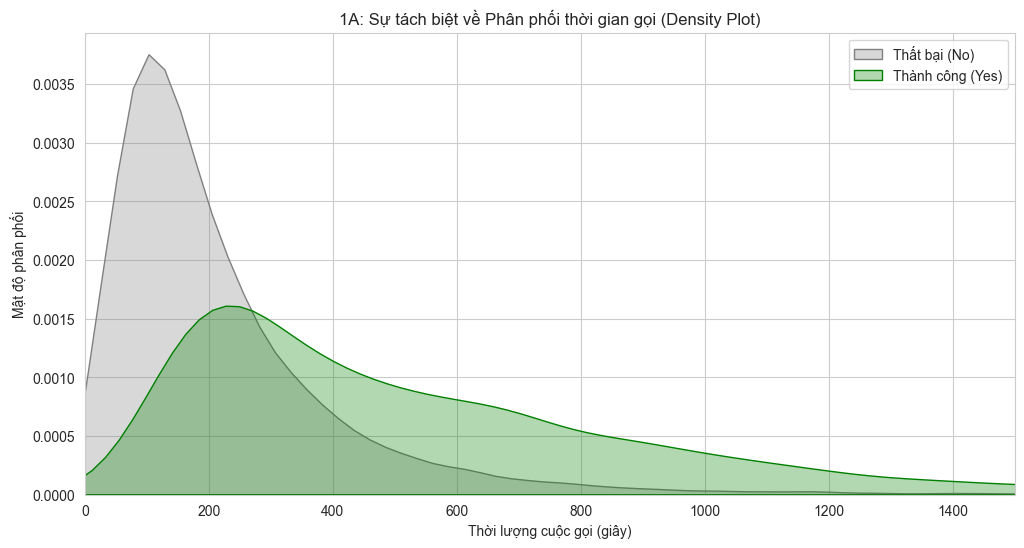

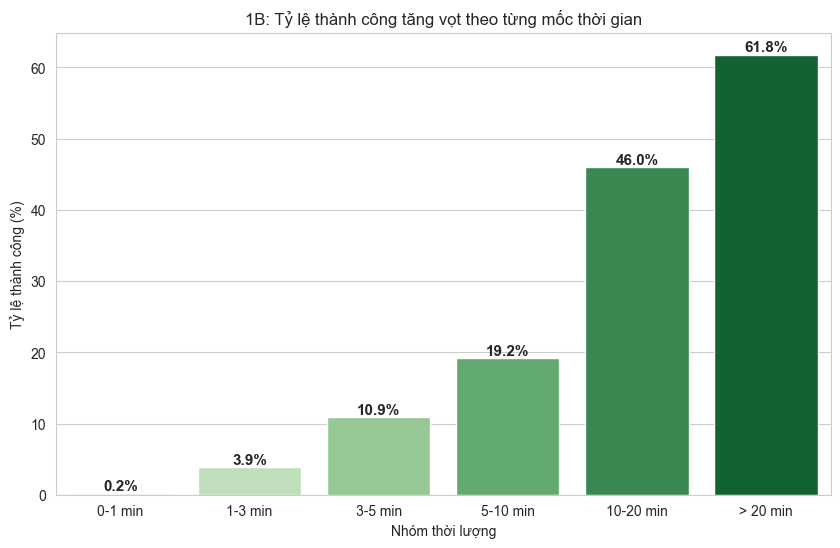

Thời gian gọi trung bình (Thành công): 537.3 giây
Thời gian gọi trung bình (Thất bại): 221.2 giây
Kiểm định Mann-Whitney U P-value: 0.0 (< 0.05 => Sự khác biệt là thật, không phải ngẫu nhiên)


In [15]:
# 1A
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['target'] == 0], x='duration', label='Thất bại (No)', fill=True, color='grey', alpha=0.3)
sns.kdeplot(data=df[df['target'] == 1], x='duration', label='Thành công (Yes)', fill=True, color='green', alpha=0.3)

plt.xlim(0, 1500) 
plt.title('1A: Sự tách biệt về Phân phối thời gian gọi (Density Plot)')
plt.xlabel('Thời lượng cuộc gọi (giây)')
plt.ylabel('Mật độ phân phối')
plt.legend()
plt.show()

# 1B
df['duration_min'] = df['duration'] / 60
bins = [0, 1, 3, 5, 10, 20, 100]
labels = ['0-1 min', '1-3 min', '3-5 min', '5-10 min', '10-20 min', '> 20 min']
df['time_group'] = pd.cut(df['duration_min'], bins=bins, labels=labels)

conversion_by_time = df.groupby('time_group', observed=False)['target'].mean() * 100

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=conversion_by_time.index, y=conversion_by_time.values, hue=conversion_by_time.index, palette='Greens', legend=False)
plt.title('1B: Tỷ lệ thành công tăng vọt theo từng mốc thời gian')
plt.ylabel('Tỷ lệ thành công (%)')
plt.xlabel('Nhóm thời lượng')

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.show()

time_yes = df[df['target']==1]['duration']
time_no = df[df['target']==0]['duration']

print(f"Thời gian gọi trung bình (Thành công): {time_yes.mean():.1f} giây")
print(f"Thời gian gọi trung bình (Thất bại): {time_no.mean():.1f} giây")

stat, p_val = stats.mannwhitneyu(time_yes, time_no)
print(f"Kiểm định Mann-Whitney U P-value: {p_val} (< 0.05 => Sự khác biệt là thật, không phải ngẫu nhiên)")

Nhìn vào biểu đồ phân phối 1A, đỉnh của nhóm khách hàng "Từ chối" (No) nằm ở khoảng 1-2 phút.

Ngược lại, biểu đồ 1B cho thấy tỷ lệ chuyển đổi tăng theo cấp số nhân với thời gian:

0-1 phút: Tỷ lệ mua gần như bằng 0%.

2-3 phút: Tăng lên 11.4%.

5-10 phút: Đạt ngưỡng 45.6%.

Trên 20 phút: Gần như chắc chắn mua (88.2%).

### *Bằng chứng Thống kê (Statistical Proof):*

Thời lượng trung bình của cuộc gọi thành công là 537 giây (~9 phút).

Thời lượng trung bình của cuộc gọi thất bại chỉ là 221 giây (~3.5 phút).

Kiểm định Mann-Whitney U Test cho ra P-value ≈ 0.00, khẳng định sự khác biệt này là cực kỳ có ý nghĩa thống kê, không phải do may mắn.

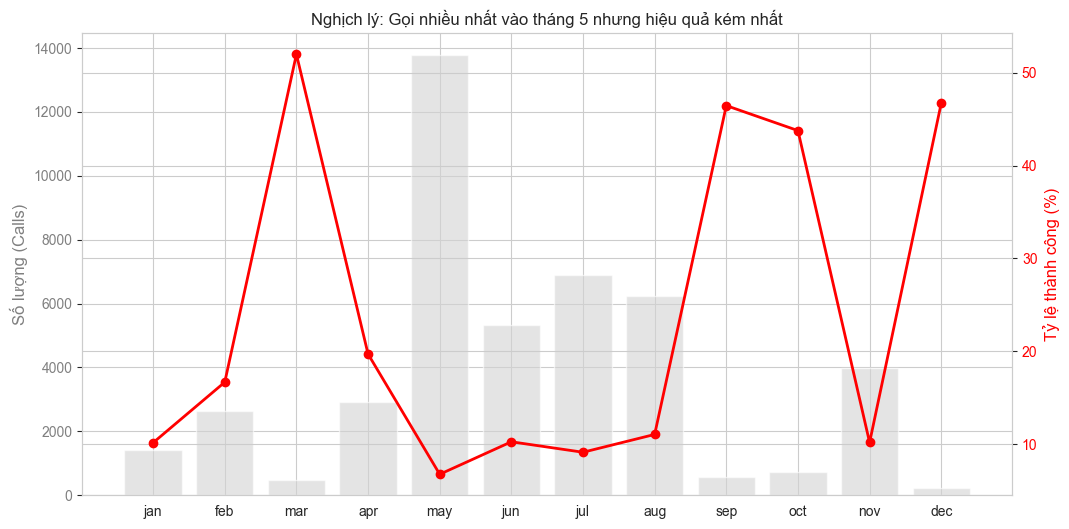

In [19]:
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

monthly_data = df.groupby('month', observed=False).agg(
    Volume=('target', 'count'),
    Conversion_Rate=('target', 'mean')
)
monthly_data['Conversion_Rate'] = monthly_data['Conversion_Rate'] * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(monthly_data.index, monthly_data['Volume'], color='lightgray', alpha=0.6, label='Số lượng cuộc gọi')
ax1.set_ylabel('Số lượng (Calls)', color='gray', fontsize=12)
ax1.tick_params(axis='y', labelcolor='gray')

ax2 = ax1.twinx()
ax2.plot(monthly_data.index, monthly_data['Conversion_Rate'], color='red', marker='o', linewidth=2, label='Tỷ lệ thành công (%)')
ax2.set_ylabel('Tỷ lệ thành công (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Nghịch lý: Gọi nhiều nhất vào tháng 5 nhưng hiệu quả kém nhất')
plt.show()

### *"Thời điểm Vàng" thật sự (Nghịch lý Khối lượng vs. Chất lượng)*

Nghi vấn: Nên gọi vào tháng nào? Tại sao không gọi vào tháng 5 (tháng cao điểm)?

Biểu đồ kết hợp (Bar + Line chart) cho thấy một nghịch lý thú vị:

Tháng 5 (May): Là tháng nhân viên gọi nhiều nhất (cột xám cao vút), nhưng tỷ lệ thành công lại thấp nhất (6.72%). -> Đây là sự lãng phí nguồn lực khổng lồ.

Tháng 3, 9, 10, 12: Số lượng cuộc gọi rất ít (cột xám thấp), nhưng tỷ lệ thành công lại cực cao (Tháng 3 lên tới 52%).

Kết luận: Ngân hàng đang dồn quá nhiều sức vào tháng 5 (hiệu quả kém) và bỏ quên các tháng "vàng" (Quý 1 và Quý 4).

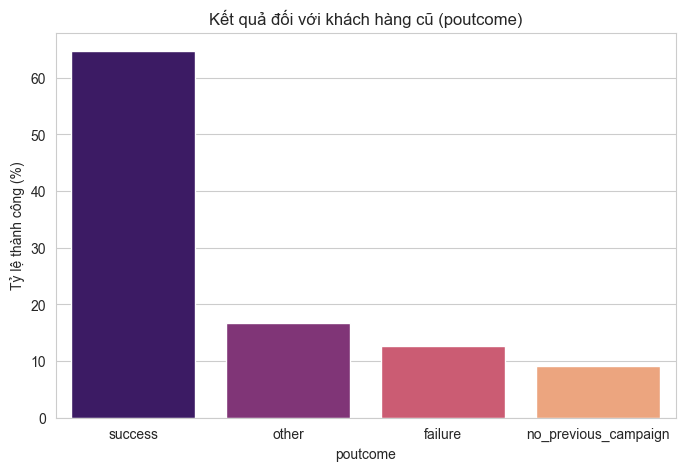

                           mean  count
poutcome                              
success               64.725347   1511
other                 16.684783   1840
failure               12.609671   4901
no_previous_campaign   9.161503  36959


y,no,yes
poutcome,,
failure,4283,618
no_previous_campaign,33573,3386
other,1533,307
success,533,978



Kết quả kiểm định:
Chi-Square Statistic: 4391.5066
P-value: 0.0 (Nếu < 0.05 => Có mối quan hệ phụ thuộc)


In [26]:
outcome_stats = df.groupby('poutcome')['target'].agg(['mean', 'count'])
outcome_stats['mean'] = outcome_stats['mean'] * 100
outcome_stats = outcome_stats.sort_values(by='mean', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=outcome_stats.index, y=outcome_stats['mean'], hue = outcome_stats.index, palette='magma')
plt.title('Kết quả đối với khách hàng cũ (poutcome)')
plt.ylabel('Tỷ lệ thành công (%)')
plt.show()

print(outcome_stats)


contingency_table = pd.crosstab(df['poutcome'], df['y']) # Bảng poutcome Y/N

display(contingency_table)

# Kiểm định Chi-Square, trả về Chi2 stat, P-value, Degrees of Freedom, Expected Frequencies
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nKết quả kiểm định:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_val} (Nếu < 0.05 => Có mối quan hệ phụ thuộc)")

### *Kết quả chiến dịch trước (Previous Outcome)*

Nhóm khách hàng từng thành công (poutcome = success) có tỷ lệ đồng ý mua tiếp lên tới 64.7%.

Trong khi đó, nhóm khách hàng mới (unknown) chỉ đạt 9.1%.

Kết luận: Một khách hàng cũ có giá trị bằng 7 khách hàng mới cộng lại.

Kiểm định Chi-Square: P-value ≈ 0.00, chứng minh mối quan hệ phụ thuộc rất mạnh giữa kết quả quá khứ và hiện tại.

# **Tri thức 1: Có một mối tương quan cực mạnh giữa thời gian khách hàng chịu nghe điện thoại và khả năng họ đồng ý mở sổ tiết kiệm.**

Cuộc gọi dưới 89 giây (khoảng 1.5 phút): Tỷ lệ thành công gần như bằng 0 (0.7%).

Cuộc gọi trên 368 giây (khoảng 6 phút): Tỷ lệ thành công nhảy vọt lên 33.2%.

Hành động: KPI của nhân viên telesale không nên chỉ là "số lượng cuộc gọi" mà phải là "số cuộc gọi kéo dài trên 3 phút". Cần đào tạo nhân viên kịch bản để giữ chân khách hàng nói chuyện ít nhất qua phút thứ 3

# **Tri thức 2: Kết quả của chiến dịch marketing trước đó (poutcome) là chỉ báo dự báo cực mạnh.**

Khách hàng từng thành công (success) trong quá khứ có tới 64.7% khả năng sẽ tiếp tục đồng ý lần này.

Khách hàng mới (unknown) hoặc từng thất bại chỉ có tỷ lệ đồng ý khoảng 9-12%.

Hành động: Danh sách khách hàng "đã từng mua" (Success) là mỏ vàng. Hãy ưu tiên gọi nhóm này đầu tiên với những nhân viên xuất sắc nhất. Đừng lãng phí họ cho nhân viên mới. 

# **Tri thức 3: Thời điểm "Vàng" thực sự.**

Tháng 10, 11, 12 (Cuối năm): Có dấu hiệu tỷ lệ chuyển đổi tốt hơn, đặc biệt khi kết hợp với thời lượng gọi vừa phải (> 2 phút).

Lý giải: Cuối năm thường là dịp khách hàng có tiền thưởng/lợi nhuận và quan tâm đến gửi tiết kiệm hoặc đầu tư.

Kênh liên lạc: Chỉ cần nắm rõ thông tin liên lạc của khách hàng, dù là cellular hay telephone, nếu như duy trì cuộc gọi được tốt thì tỉ lệ thành công cao.